<a href="https://colab.research.google.com/github/2303A51692/ADM_Lab/blob/main/Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)

In [3]:
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [4]:
print(outliers)

[7.08705502 6.11053905 5.59932684 6.68807586 9.71454852]


In [5]:
data.max()

np.float64(1.8522781845089378)

In [6]:
data.min()

np.float64(-2.6197451040897444)

In [7]:
data_series = pd.Series(data)
data_series.describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [8]:
outliers.max()

np.float64(9.714548519562596)

In [9]:
outliers.min()

np.float64(5.599326836668414)

In [10]:
outliers_series = pd.Series(outliers)
outliers_series.describe()

,0
count,5.000000
mean,7.039909
std,1.598336
min,5.599327
25%,6.110539
50%,6.688076
75%,7.087055
max,9.714549


In [11]:
data_with_outliers=np.concatenate([data,outliers])

In [12]:
df=pd.DataFrame(data_with_outliers,columns=['Value'])

In [13]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [14]:
print(lower_bound)

-2.3232332563637335


In [15]:
print(upper_bound)

2.372622015963629


In [16]:
print(IQR)

1.1739638180818406


In [17]:
outliers_iqr=df[(df['Value']<lower_bound) | (df['Value']>upper_bound)]

In [18]:
print(outliers_iqr)

        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


In [19]:
z_scores=stats.zscore(df['Value'])
outliers_zscore=df[np.abs(z_scores)>3]

In [20]:
print(outliers_zscore)

        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


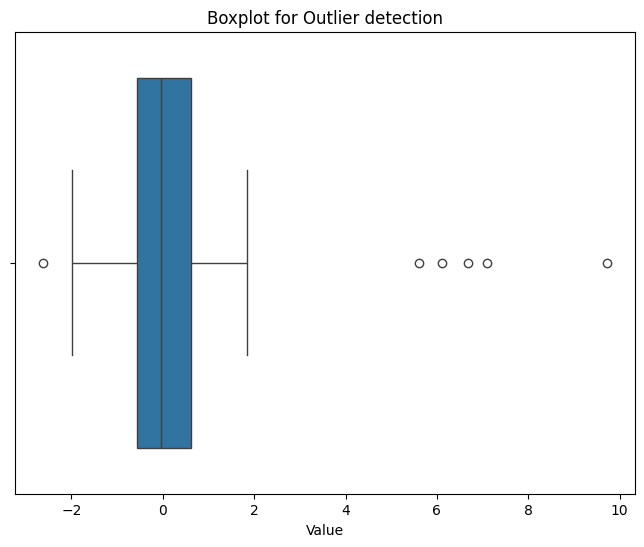

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Value'])
plt.title('Boxplot for Outlier detection')
plt.show()

In [22]:
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lower_bound, upper_bound)

In [23]:
print(df_capped)

        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  2.372622
101  2.372622
102  2.372622
103  2.372622
104  2.372622

[105 rows x 1 columns]


In [24]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lower_bound) & (df_removed['Value']<=upper_bound)]

In [25]:
print(df_removed)

       Value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [26]:
df_imputed=df.copy()
df_imputed=df.copy()
median_value=df['Value'].median()
df_imputed['Value']=np.where(((df_imputed['Value']<lower_bound) | (df_imputed['Value']>upper_bound)),median_value,df_imputed['Value'])

In [27]:
print(df_imputed)

        Value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]


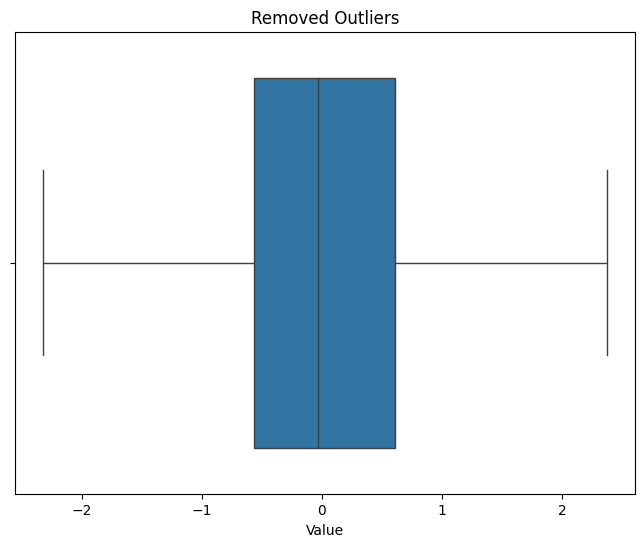

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['Value'])
plt.title('Removed Outliers')
plt.show()

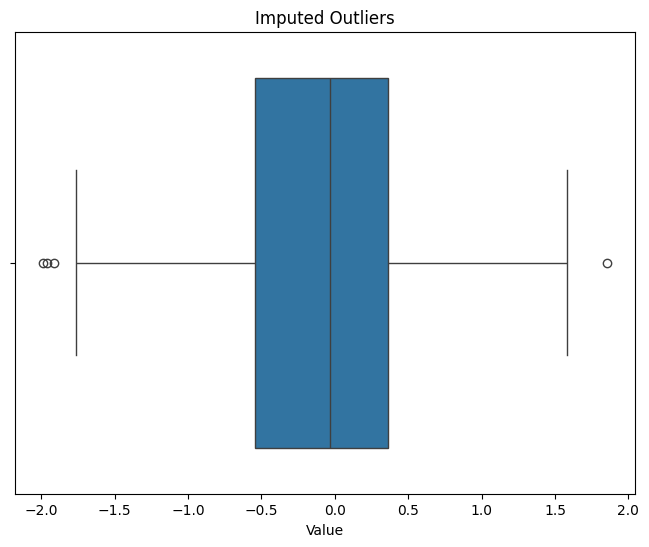

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_imputed['Value'])
plt.title('Imputed Outliers')
plt.show()

In [30]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"\nOutliers detected using Z-score:\n{outliers_zscore}")

Outliers detected using IQR:
        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549

Outliers detected using Z-score:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
